2. Design RNN or its variant including LSTM or GRU a) Select a suitable time series dataset.
Example – predict sentiments based on product reviews b) Apply for prediction

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load dataset with only the top 10,000 most common words
vocab_size = 10000
max_len = 200  # pad or truncate reviews to this length


(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194,

'(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)\n\n# Pad sequences\nX_train = pad_sequences(X_train, maxlen=max_len)\nX_test = pad_sequences(X_test, maxlen=max_len)'

In [3]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    LSTM(128),
    Dense(1, activation='sigmoid')  # Binary classification (positive/negative)
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)


Epoch 1/5


/home/pl1/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-04-22 13:55:41.903451: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 179ms/step - accuracy: 0.6639 - loss: 0.5919 - val_accuracy: 0.8514 - val_loss: 0.3457
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 178ms/step - accuracy: 0.8991 - loss: 0.2545 - val_accuracy: 0.8520 - val_loss: 0.3585
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 178ms/step - accuracy: 0.9293 - loss: 0.1899 - val_accuracy: 0.8770 - val_loss: 0.3124
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 183ms/step - accuracy: 0.9551 - loss: 0.1320 - val_accuracy: 0.8486 - val_loss: 0.3616
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 177ms/step - accuracy: 0.9635 - loss: 0.1098 - val_accuracy: 0.8458 - val_loss: 0.3930


782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8444 - loss: 0.4021
Test Accuracy: 84.44%
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step


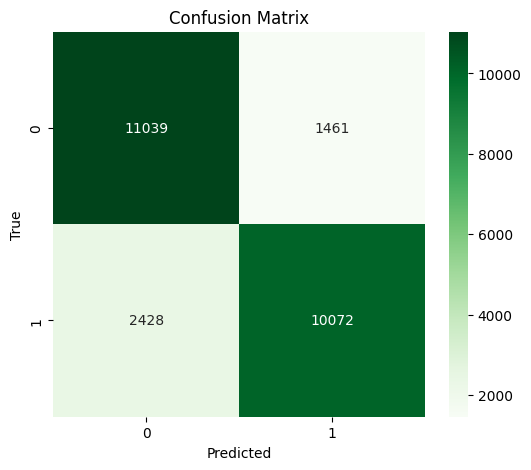

              precision    recall  f1-score   support

    Negative       0.82      0.88      0.85     12500
    Positive       0.87      0.81      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.85      0.84      0.84     25000
weighted avg       0.85      0.84      0.84     25000



In [4]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predict
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
   
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))